In [ ]:
! git clone https://github.com/SkalskiP/yolov9.git
! pip install -r yolov9/requirements.txt -q

Cloning into 'yolov9'...
remote: Enumerating objects: 325, done.
remote: Total 325 (delta 0), reused 0 (delta 0), pack-reused 325 (from 1)
Receiving objects: 100% (325/325), 2.25 MiB | 8.39 MiB/s, done.
Resolving deltas: 100% (162/162), done.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 82.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 50.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 35.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
!mkdir -p {HOME}/weights
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/yolov9-c.pt
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/gelan-c.pt

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="kyHUyHjO1GD1qArJUsHc")
project = rf.workspace("shooting-cards-ebmrl").project("bullet-scorecards-count")
version = project.version(3)
dataset = version.download("yolov11")




   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.1/83.1 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 18.7 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.11.0.86
    Uninstalling opencv-python-headless-4.11.0.86:
      Successfully uninstalled opencv-python-headless-4.11.0.86
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to bullet-scorecards-count-3 in yolov11:: 100%|██████████| 98/98 [00:00<00:00, 6274.39it/s]


In [ ]:
# prompt: read f'{path}/data.yaml' with yaml and rewrite the file: - remove the 'test', change 'train'  and 'val' to HOME

import yaml

with open(f'/content/bullet-scorecards-count-3/data.yaml', 'r') as file:
  data = yaml.safe_load(file)

data['test'] = f"/content/bullet-scorecards-count-3/test/images"
data['train'] = f"/content/bullet-scorecards-count-3/train/images"
data['val'] = f"/content/bullet-scorecards-count-3/valid/images"

with open(f'/content/bullet-scorecards-count-3/data.yaml', 'w') as file:
  yaml.dump(data, file)

In [ ]:
%cd {HOME}/yolov9

!python train.py \
--batch 8 --epochs 100 --img 640 --device 0 --min-items 0 --close-mosaic 15 \
--data {dataset.location}/data.yaml \
--weights {HOME}/weights/gelan-c.pt \
--cfg models/detect/gelan-c.yaml \
--hyp hyp.scratch-high.yaml \
--project {HOME}/yolov9/results \
--name training_run_19



/content/yolov9
2025-02-26 06:37:57.450937: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1740551877.788473    1177 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1740551877.880340    1177 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-02-26 06:37:58.601009: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
wandb: (1) Create a W&B account
wandb: (2) Use an existing W&B account
wandb: (3) Don't visualize my 

In [ ]:
import pandas as pd

# Load the CSV file
file_path = '/content/yolov9/results/training_run_19/results.csv'
data = pd.read_csv(file_path, delimiter='\t')

# Print the columns to verify the names
print(data.columns)

Index(['               epoch,      train/box_loss,      train/cls_loss,      train/dfl_loss,   metrics/precision,      metrics/recall,     metrics/mAP_0.5,metrics/mAP_0.5:0.95,        val/box_loss,        val/cls_loss,        val/dfl_loss,               x/lr0,               x/lr1,               x/lr2'], dtype='object')


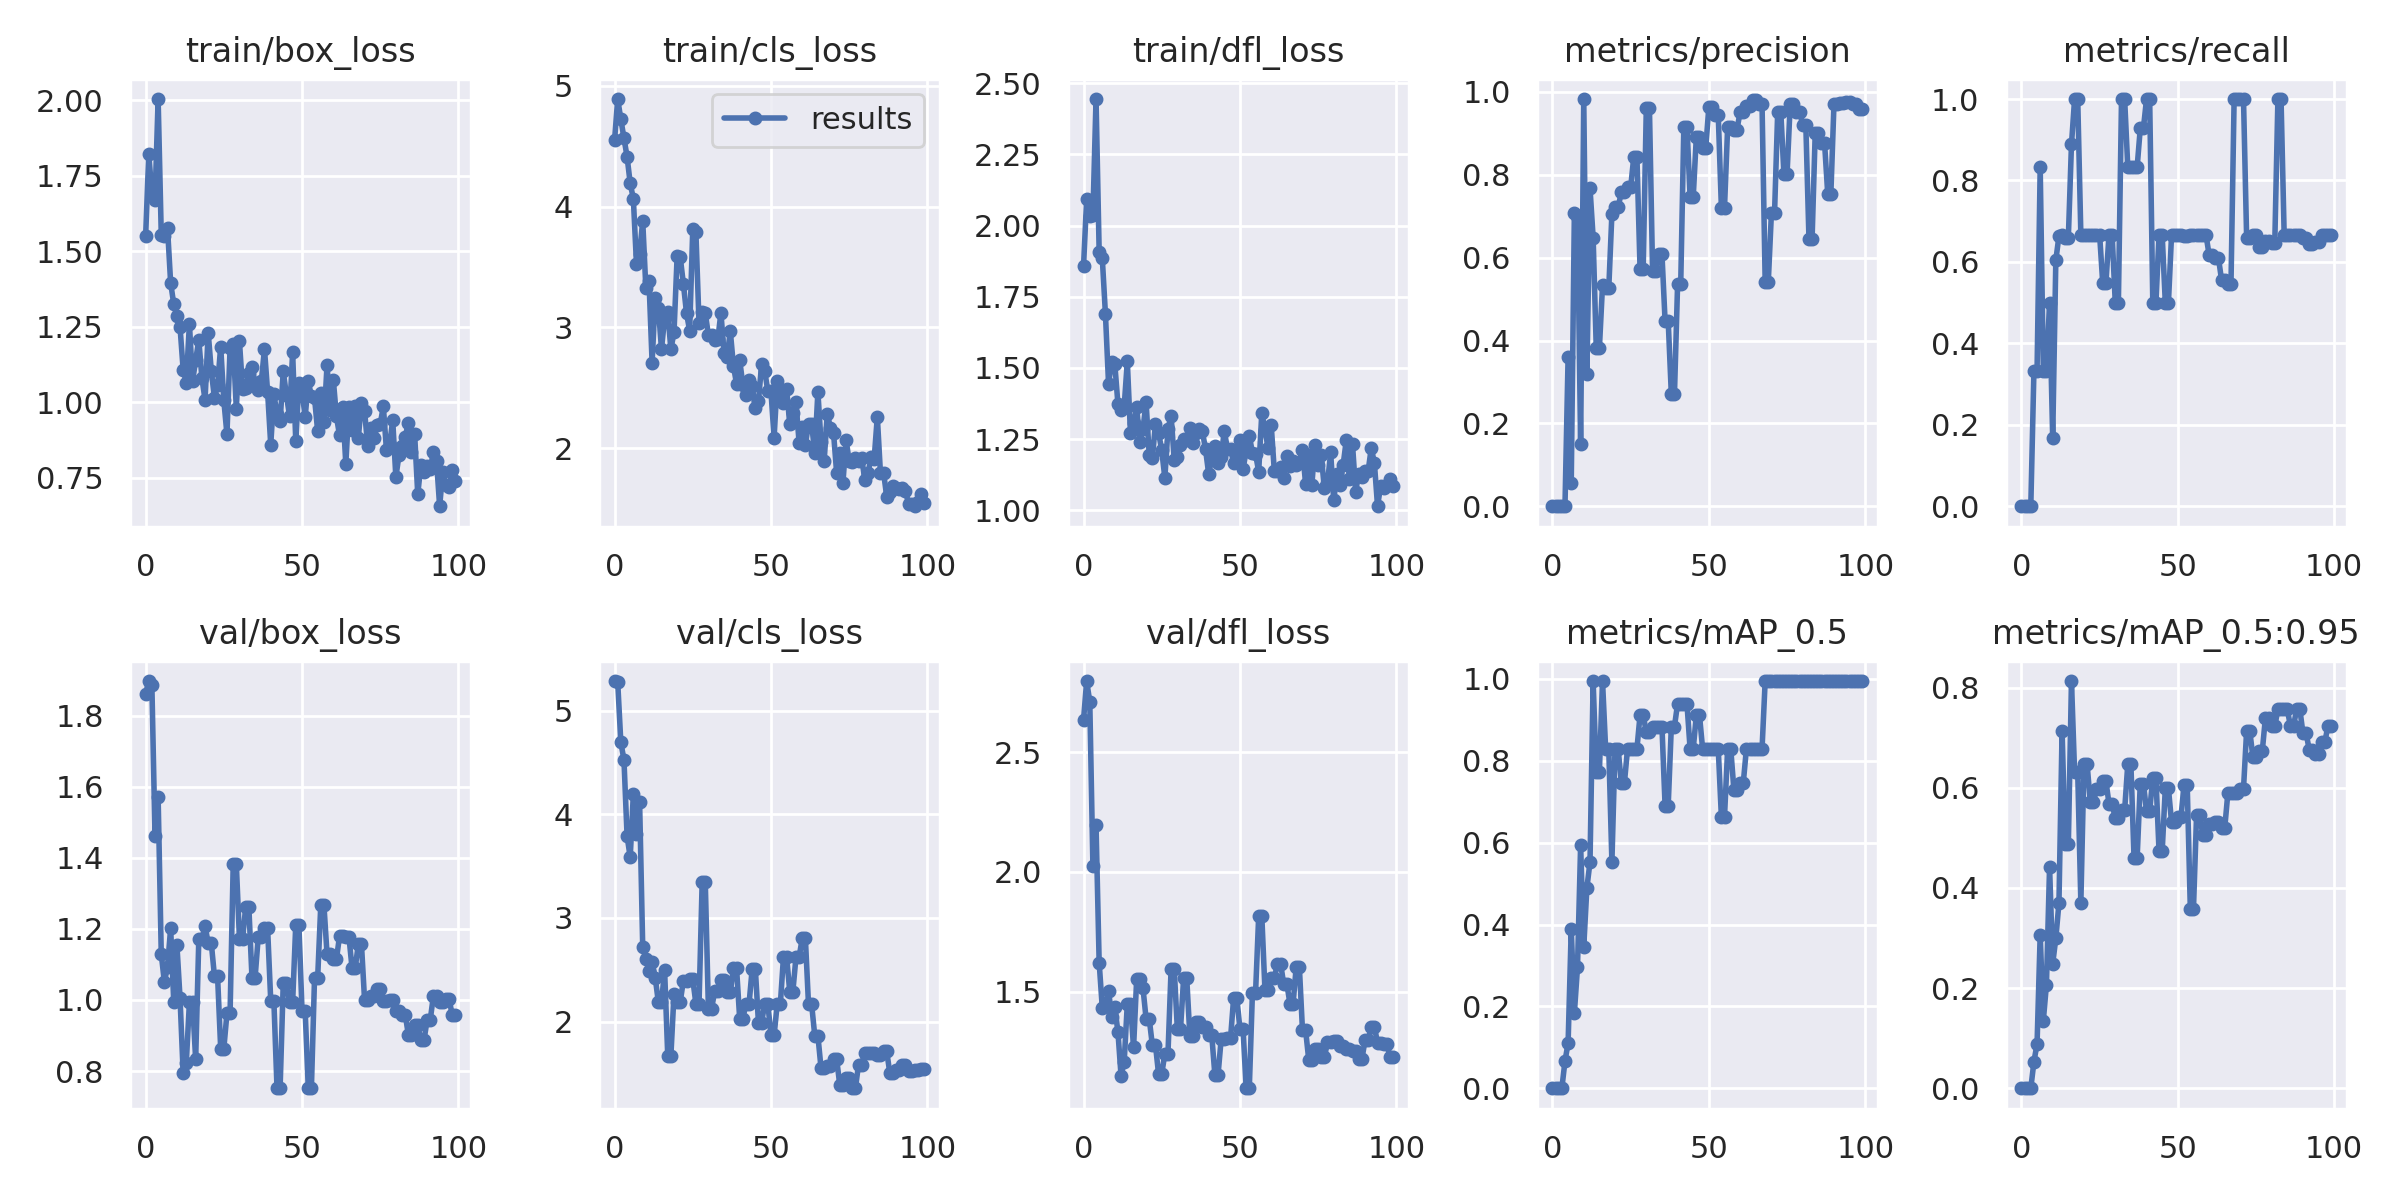

In [ ]:
from IPython.display import Image, display

# Display the image in Colab
display(Image(filename="/content/yolov9/results/training_run_19/results.png"))



In [ ]:
!python /content/yolov9/detect.py --weights /content/yolov9/results/training_run_18/weights/best.pt \
--conf 0.1 --source /content/bullet-scorecards-count-3/test/images

detect: weights=['/content/yolov9/results/training_run_18/weights/best.pt'], source=/content/bullet-scorecards-count-3/test/images, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 1e33dbb Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

/content/yolov9/models/experimental.py:75: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a f

In [ ]:
!python /content/yolov9/detect.py --weights /content/yolov9/results/training_run_18/weights/last.pt \
--conf 0.1 --source /content/bullet-scorecards-count-3/test/images

detect: weights=['/content/yolov9/results/training_run_18/weights/last.pt'], source=/content/bullet-scorecards-count-3/test/images, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 1e33dbb Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

/content/yolov9/models/experimental.py:75: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a f

In [ ]:
!python /content/yolov9/detect.py --weights /content/yolov9/results/training_run_18/weights/best.pt \
--conf 0.1 --source /content/bullet-scorecards-count-3/train/images

detect: weights=['/content/yolov9/results/training_run_18/weights/best.pt'], source=/content/bullet-scorecards-count-3/train/images, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 1e33dbb Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

/content/yolov9/models/experimental.py:75: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a 

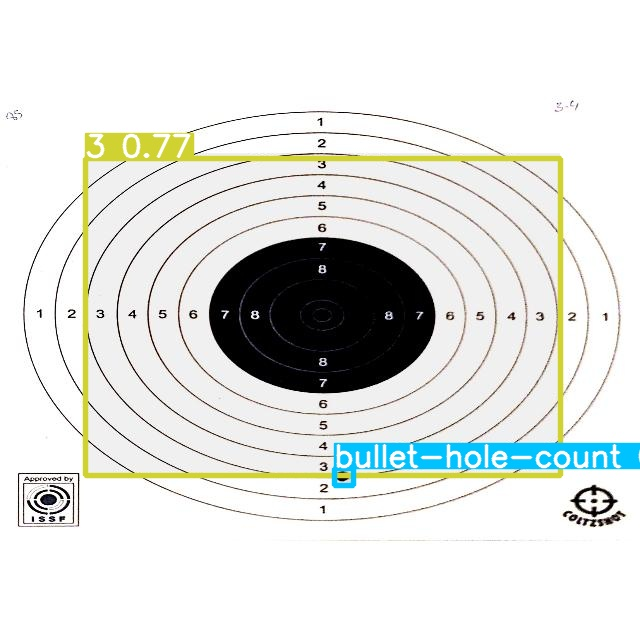

In [ ]:
from IPython.display import Image, display

# Display the image in Colab
display(Image(filename="/content/yolov9/runs/detect/exp3/085_png.rf.222c8fe77fbd5f69d0e228b6b7c50fe8.jpg"))

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

yolo = r"/content/yolov9/results/training_run_18/results.csv"
data = pd.read_csv(yolo)

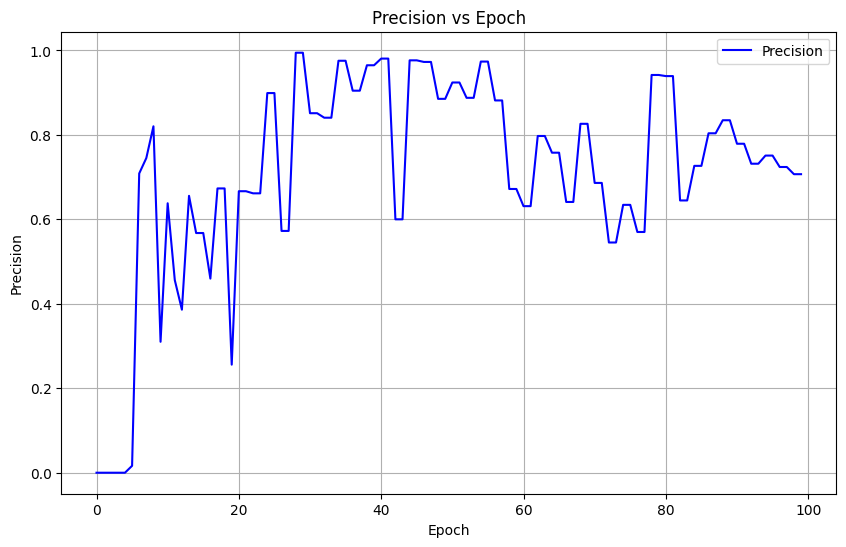

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(data['               epoch'], data['   metrics/precision'], color='blue', label='Precision')
plt.xlabel('Epoch')
plt.ylabel('Precision')
plt.title('Precision vs Epoch')
plt.grid(True)
plt.legend()
plt.show()

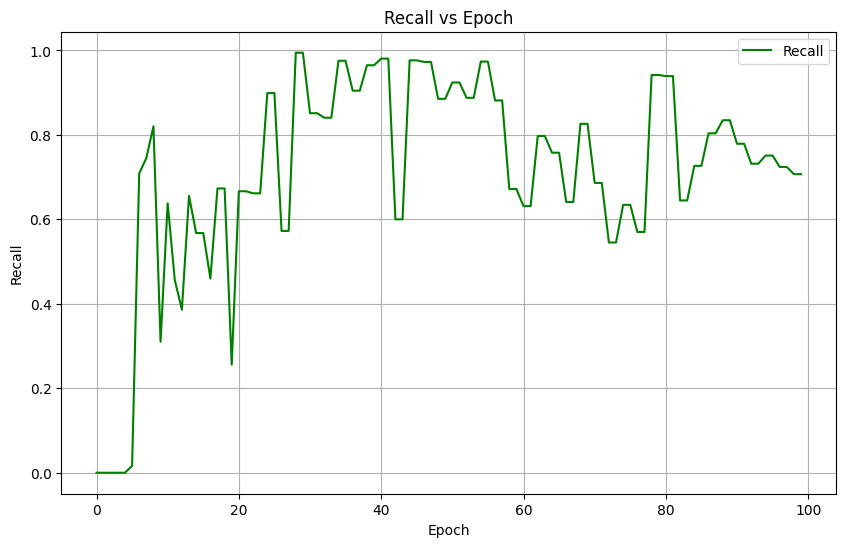

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(data['               epoch'], data['   metrics/precision'], color='green', label='Recall')
plt.xlabel('Epoch')
plt.ylabel('Recall')
plt.title('Recall vs Epoch')
plt.grid(True)
plt.legend()
plt.show()

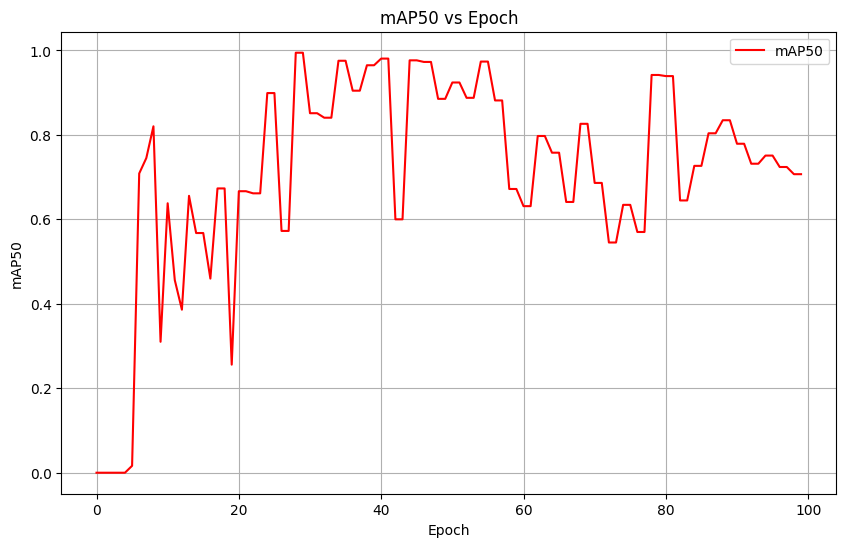

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(data['               epoch'], data['   metrics/precision'], color='red', label='mAP50')
plt.xlabel('Epoch')
plt.ylabel('mAP50')
plt.title('mAP50 vs Epoch')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
data['   metrics/precision']

,metrics/precision
0,0.00000
1,0.00000
2,0.00000
3,0.00000
4,0.00000
...,...
95,0.75108
96,0.72402
97,0.72402
98,0.70700


In [ ]:
data['   metrics/precision'].mean()

0.9271899999999997

In [ ]:
data['      metrics/recall'].mean()

0.8181946666666668

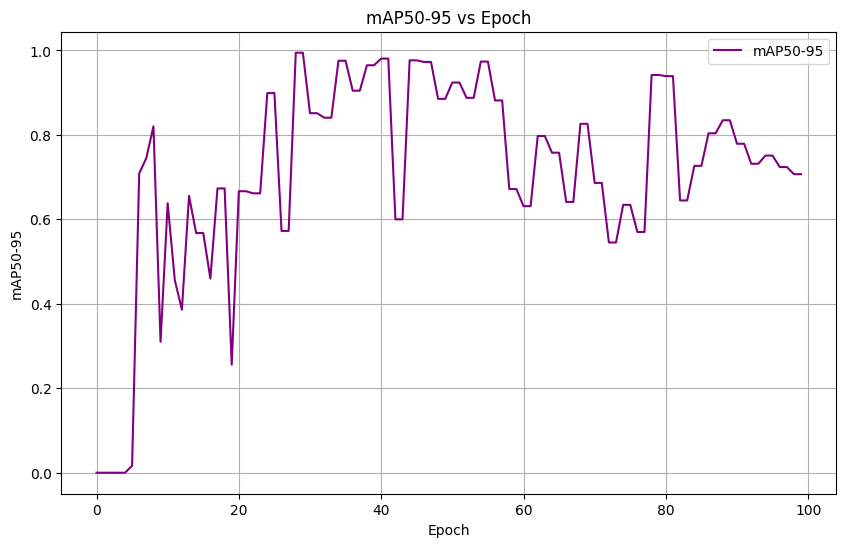

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(data['               epoch'], data['   metrics/precision'], color='purple', label='mAP50-95')
plt.xlabel('Epoch')
plt.ylabel('mAP50-95')
plt.title('mAP50-95 vs Epoch')
plt.grid(True)
plt.legend()
plt.show()

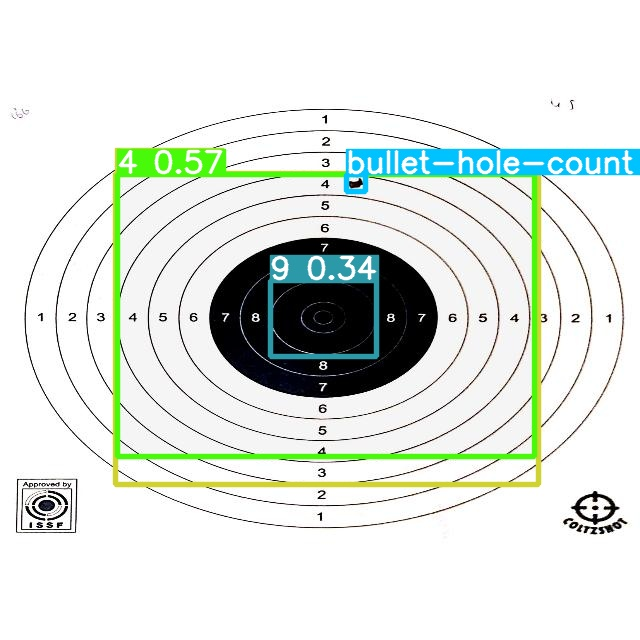

In [ ]:
import glob

# Display some test images
for image_path in glob.glob(f'/content/yolov9/runs/detect/exp3/086_png.rf.5bfe6f743ce28ab6cebc7b60d48568e1.jpg'):
      display(Image(filename=image_path, width=600))

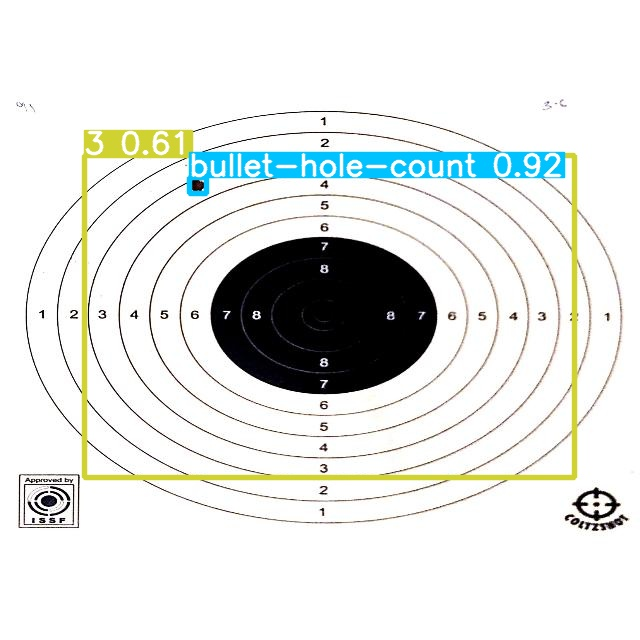

In [ ]:
import glob

# Display some test images
for image_path in glob.glob(f'/content/yolov9/runs/detect/exp3/091_png.rf.cd8fa40b6eb912f697283d39431555a1.jpg'):
      display(Image(filename=image_path, width=600))

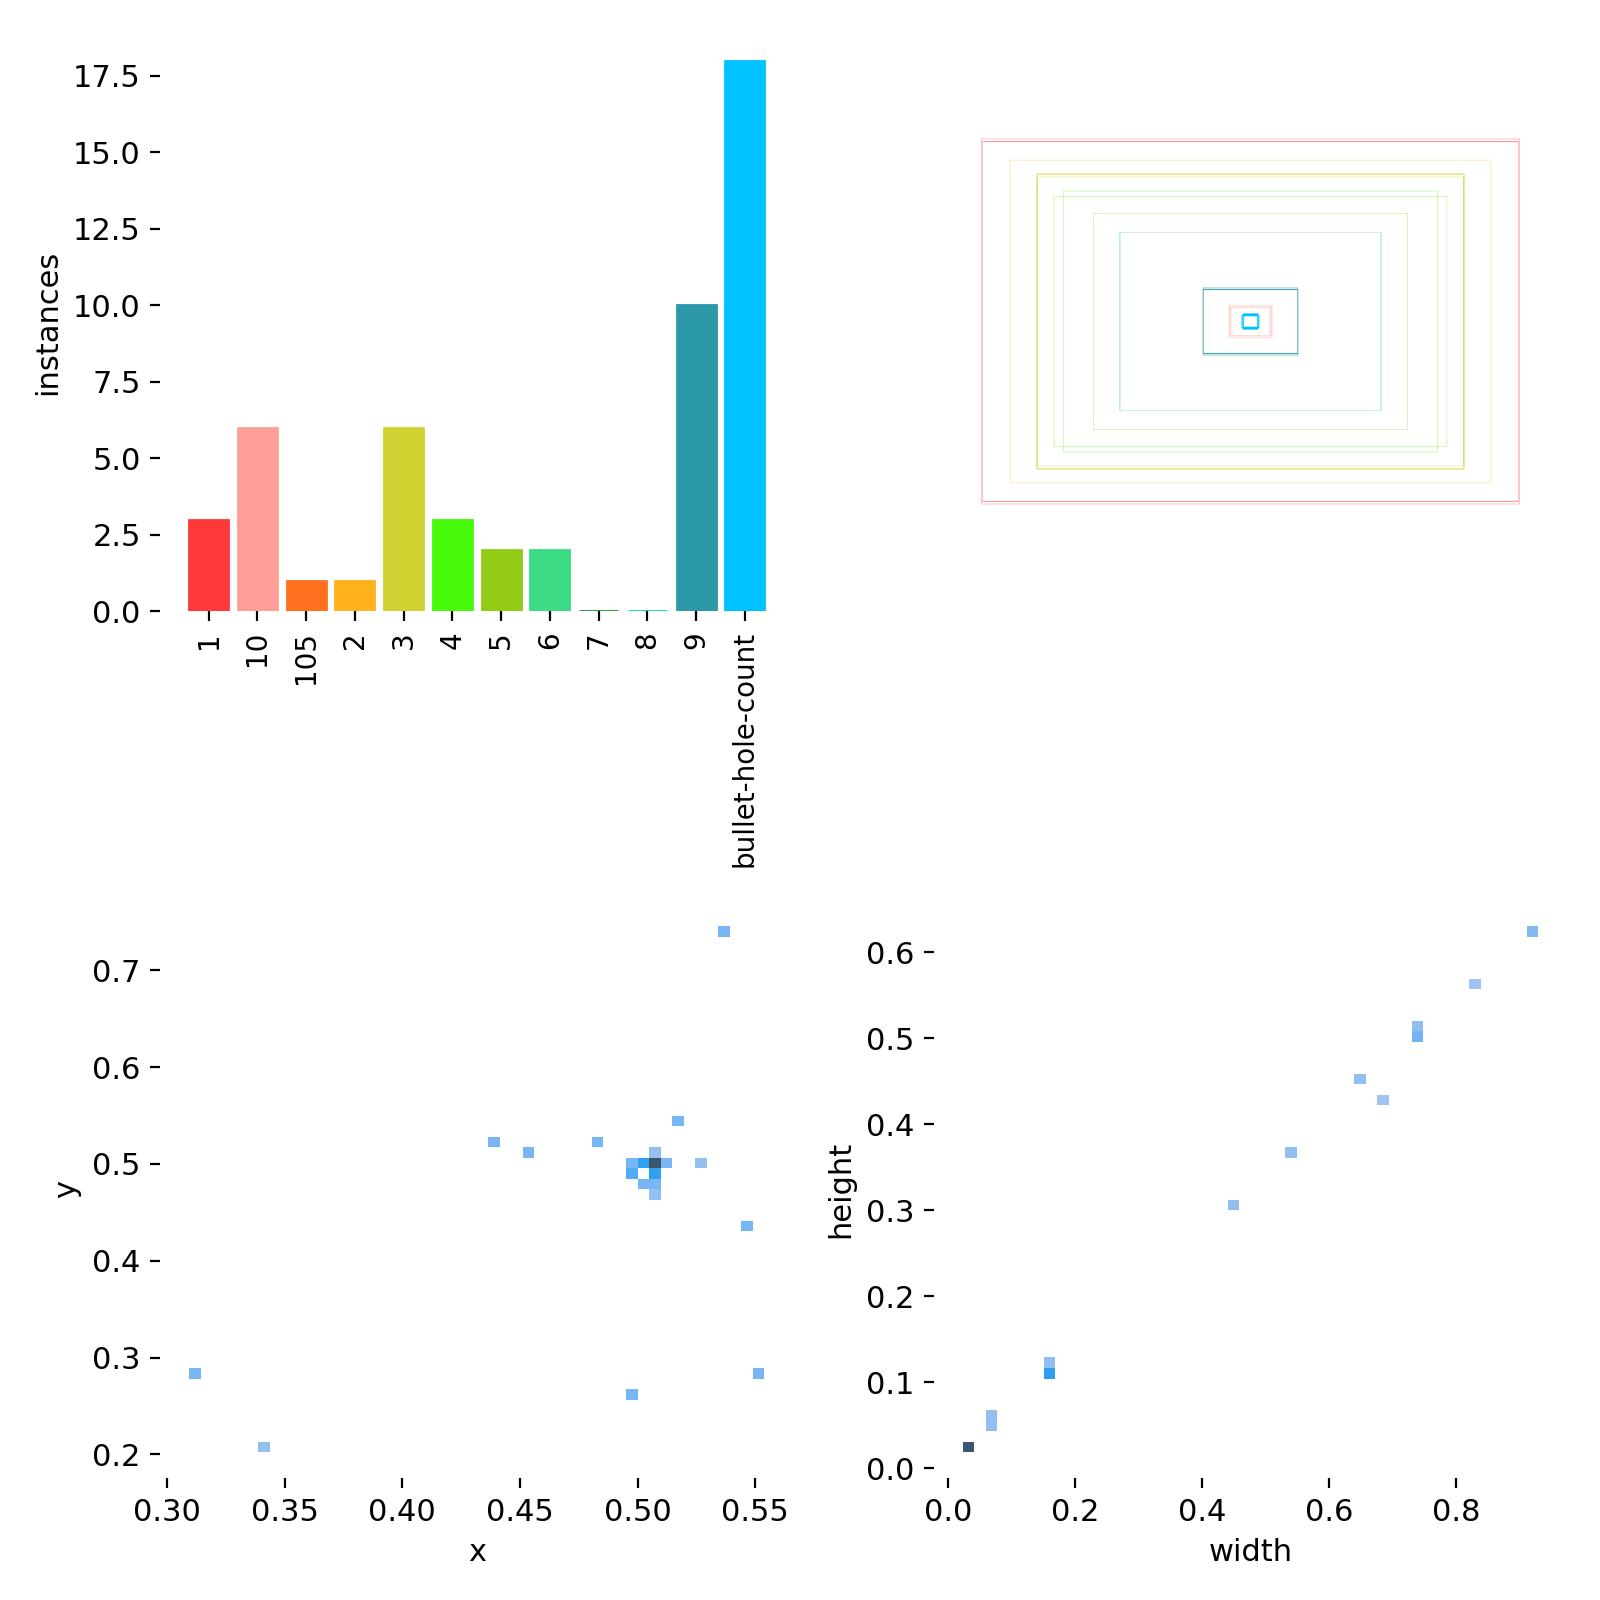

In [ ]:
Image(filename=f"/content/yolov9/results/training_run_18/labels.jpg", width=1000)